# Import libary and data

In [101]:
import numpy as np    # linear algebra
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_csv("dataset.csv")
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


# Clean Data and remove ouliers

Loại bỏ cột không liên quan và bỏ null

In [104]:
df_clean = df.drop(["Unnamed: 0", "New_Price"], axis = 1)
df_clean = df_clean.dropna()
df_clean = df_clean.reset_index()
#The length of the dataset after dropping null values
print("The length of the dataset after dropping null values is", str(len(df_clean)), "rows.")

The length of the dataset after dropping null values is 5975 rows.


Làm sạch dữ liệu dạng text --> float

In [105]:
df_clean['Mileage'] = df_clean['Mileage'].str.split(expand=True)[0].astype(float)
df_clean['Engine'] = df_clean['Engine'].str.split(expand=True)[0].astype(float)
df_clean['Power'] = df_clean['Power'].replace('null bhp', None)
df_clean['Power'] = df_clean['Power'].str.split(expand=True)[0].astype(float)

In [106]:
# rename columns
df_clean = df_clean.rename(columns = {
    'Mileage':'Mileage_kmpl',
    'Engine':'Engine_CC',
    'Power':'Power_bhp'
})

In [107]:
df_clean['Year'].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998])

## Removing outliers using IQR method

In [108]:
def remove_outlier_IQR(df, col):
  df_res = pd.DataFrame()
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  df_res=df[~((df[col]<(Q1-1.5*IQR)) | (df[col]>(Q3+1.5*IQR)))]
  return df_res

removed_outliers = df_clean
columns_to_remove_outliers = ['Kilometers_Driven', 'Mileage_kmpl', 'Engine_CC',
                              'Power_bhp', 'Seats', 'Price']
for column in columns_to_remove_outliers:
    df_cleaned = remove_outlier_IQR(removed_outliers, column)
df_train = df_cleaned

In [109]:
df_train['Company'] = df_train['Name'].str.split(expand=True)[0].str.lower()
df_train['Model'] = df_train['Name'].str.split().str[0:2].str.join(' ').str.lower()

<ipython-input-109-bece91f70415>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Company'] = df_train['Name'].str.split(expand=True)[0].str.lower()
<ipython-input-109-bece91f70415>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Model'] = df_train['Name'].str.split().str[0:2].str.join(' ').str.lower()


## Exploratory data

**BOX Plot**

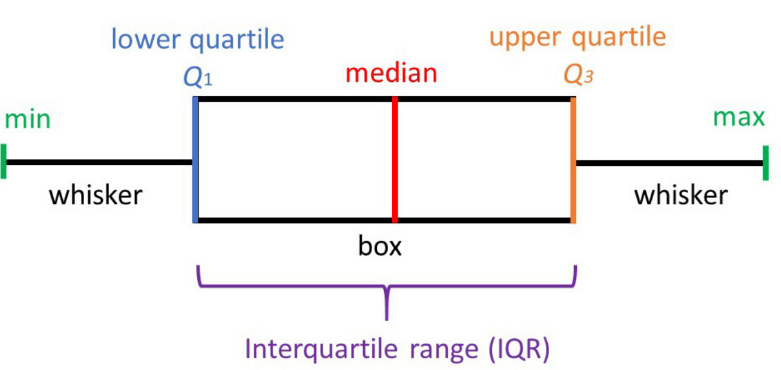



In [110]:
# this function plots histogram and boxplot for col parameter
def plot_num(df, col):
  fig, ax = plt.subplots(1, 2, figsize = (15,5))
  sns.histplot(df, x=col, kde = True, ax=ax[0])
  sns.boxplot(df, x=col, ax=ax[1])
  ax[0].set_title(f'Distribution of {col}')
  ax[1].set_title(f'{col} Boxplot')

1. Year

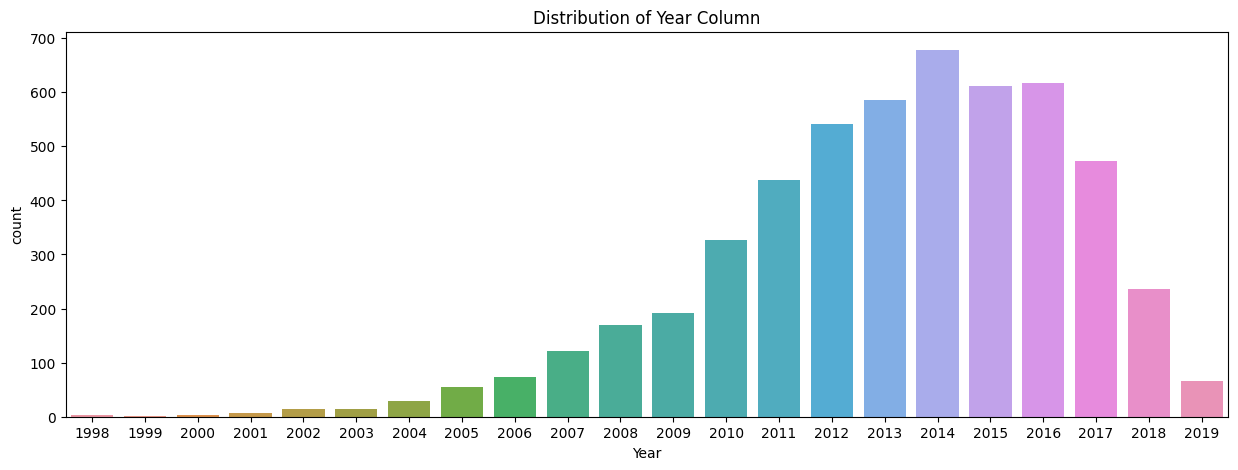

In [111]:
plt.figure(figsize=(15,5))
sns.countplot(df_train, x='Year');
plt.title('Distribution of Year Column');

2. Kilometers Driven

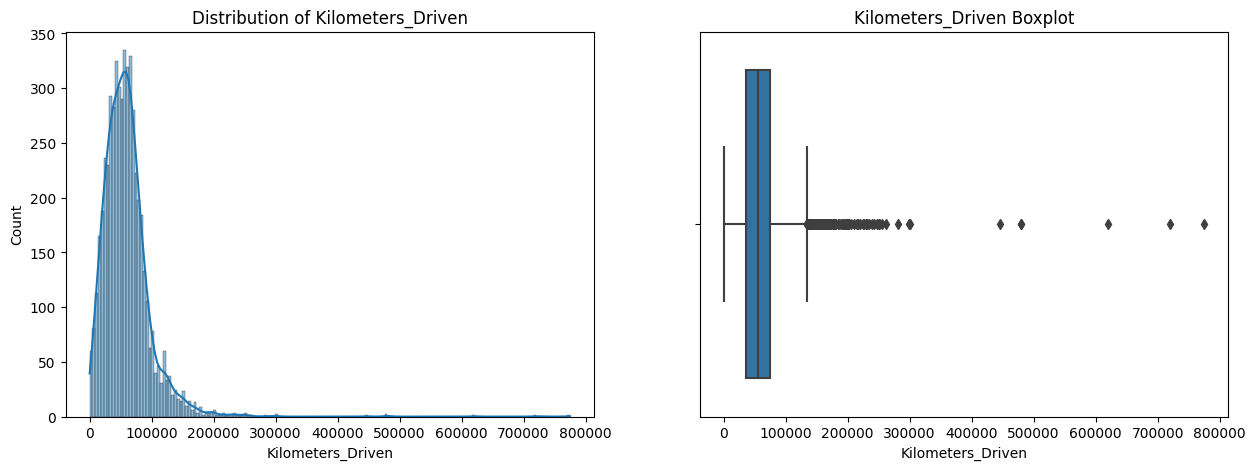

In [112]:
plot_num(df_train,'Kilometers_Driven')

3. Fuel Type

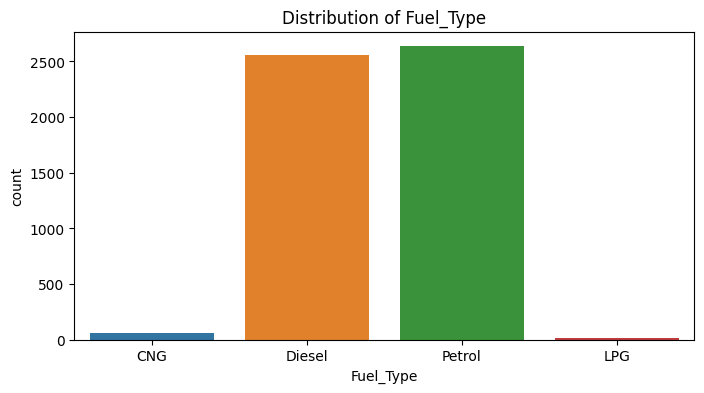

In [113]:
plt.figure(figsize=(8,4))
sns.countplot(df_train,x='Fuel_Type');
plt.title('Distribution of Fuel_Type');

4. Transmission


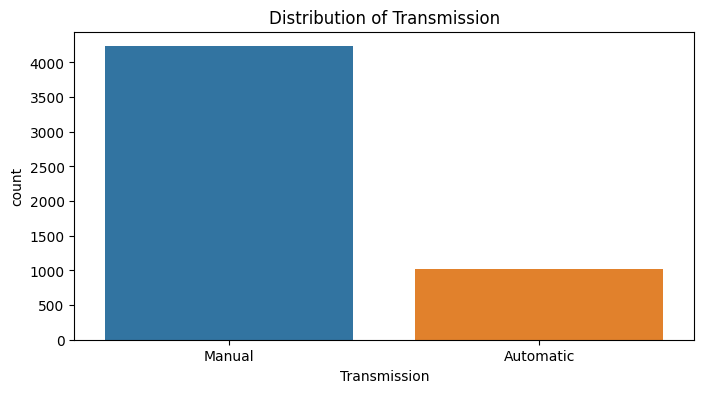

In [114]:
plt.figure(figsize=(8,4))
sns.countplot(df_train,x='Transmission');
plt.title('Distribution of Transmission');

5. Owner Type

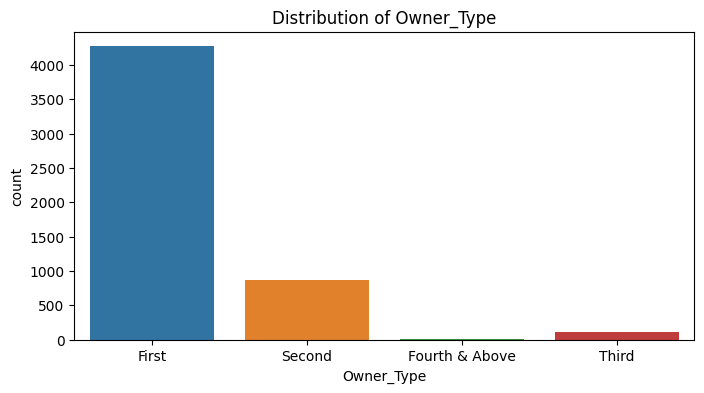

In [115]:
plt.figure(figsize=(8,4))
sns.countplot(df_train,x='Owner_Type');
plt.title('Distribution of Owner_Type');

The `Owner_Type` here needs to be converted into numerical format.

In [116]:
df_train['Owner_Type'] = df_train['Owner_Type'].map({"First":3,"Second":2,"Third":1,"Fourth & Above":0})

<ipython-input-116-6e2496cb37cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Owner_Type'] = df_train['Owner_Type'].map({"First":3,"Second":2,"Third":1,"Fourth & Above":0})


7. Mileage

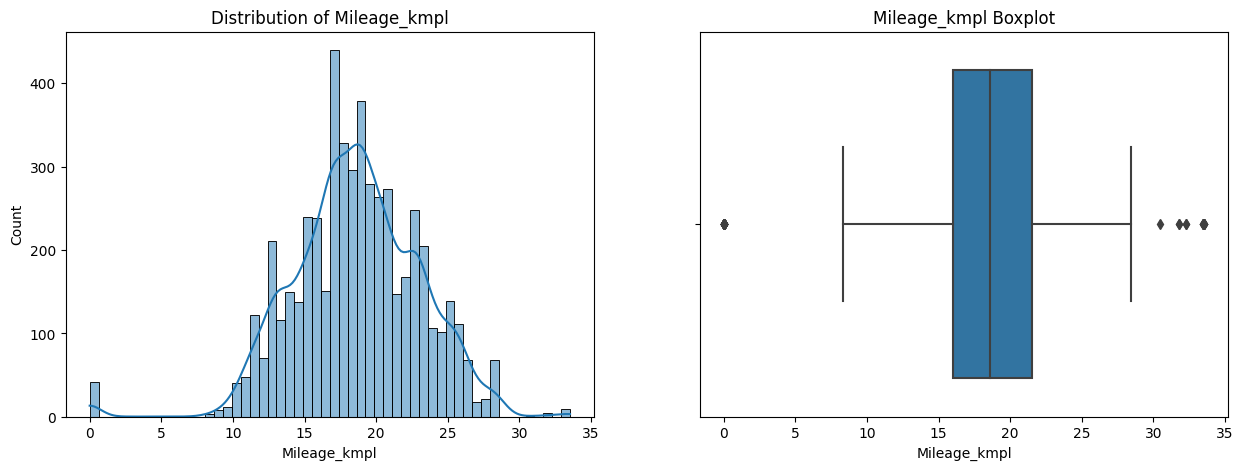

In [117]:
plot_num(df_train,'Mileage_kmpl')

8. Engine and Power

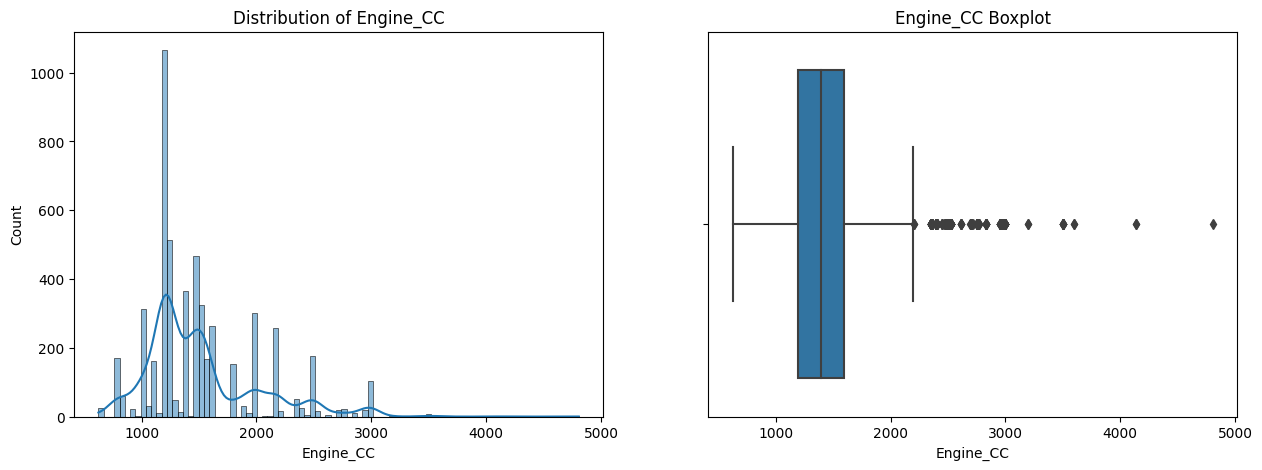

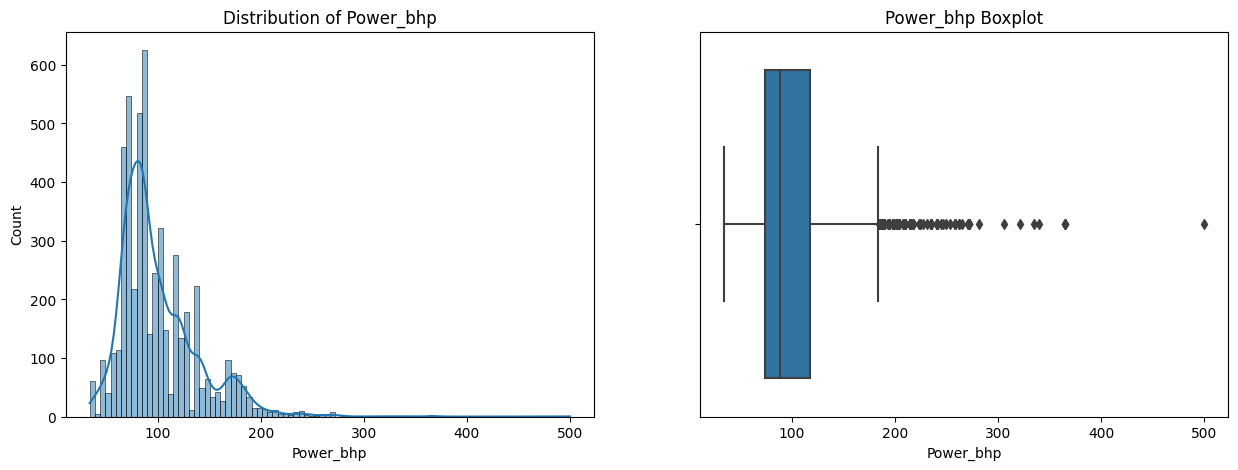

In [118]:
plot_num(df_train, 'Engine_CC')
plot_num(df_train, 'Power_bhp')

9. Location

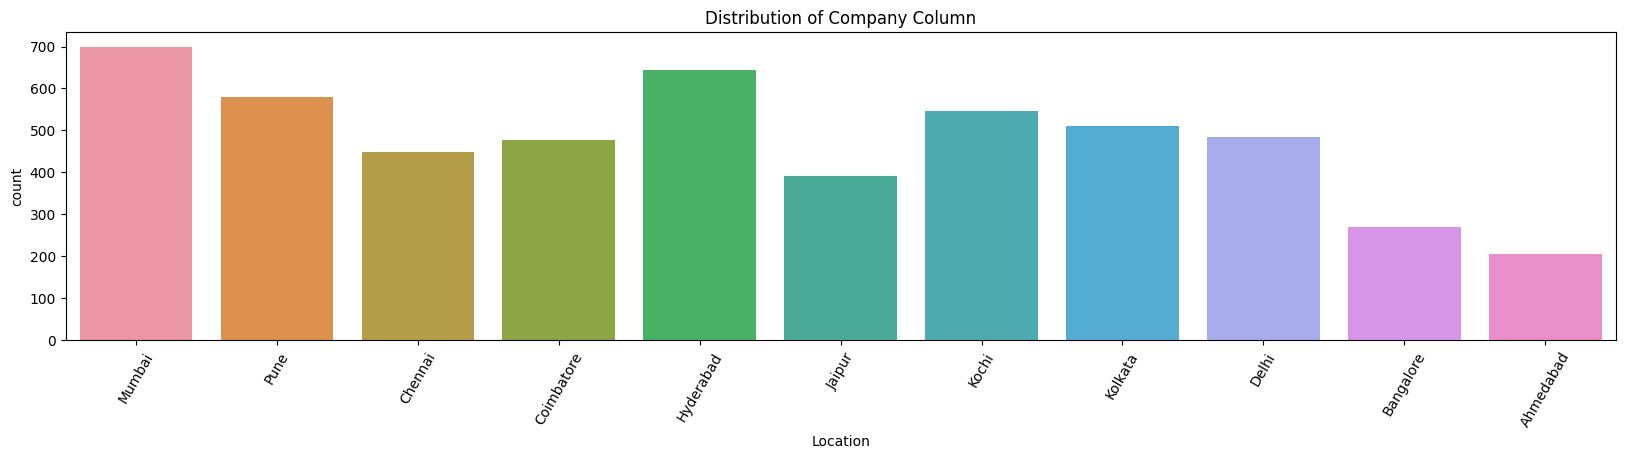

In [119]:
plt.figure(figsize=(20,4))
sns.countplot(df_train,x='Location');
plt.xticks(rotation=60)
plt.title('Distribution of Company Column');

10. Seats

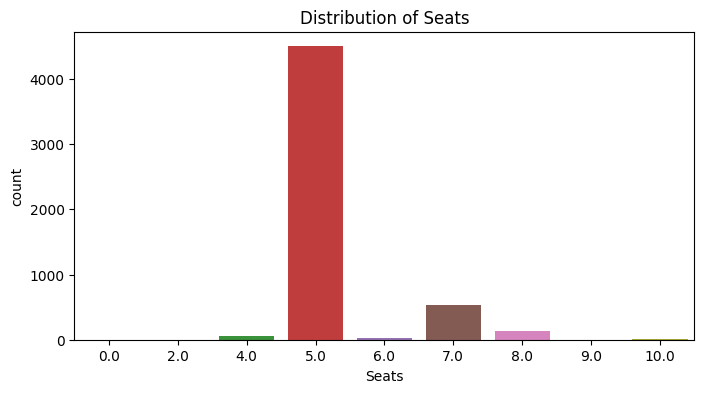

In [120]:
plt.figure(figsize=(8,4))
sns.countplot(df_train,x='Seats');
plt.title('Distribution of Seats');

In [121]:
df_train = df_train[df_train['Seats'].between(5,8)]

11. Company

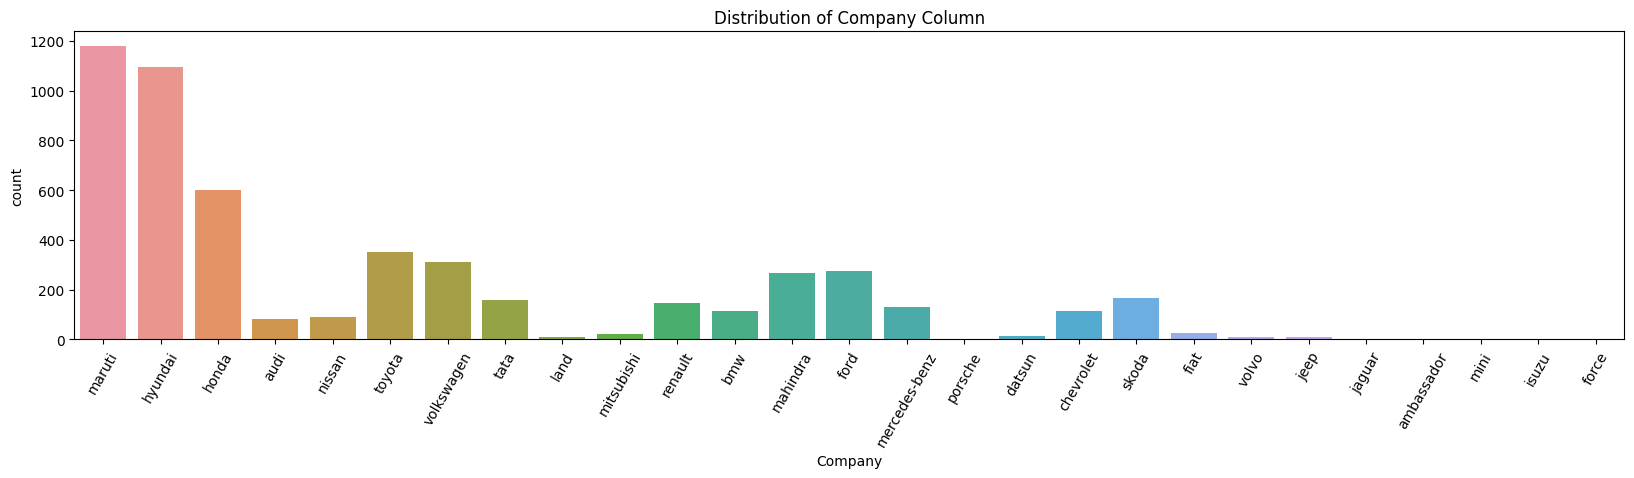

In [122]:
plt.figure(figsize=(20,4))
sns.countplot(df_train,x='Company');
plt.xticks(rotation=60)
plt.title('Distribution of Company Column');

12. Model

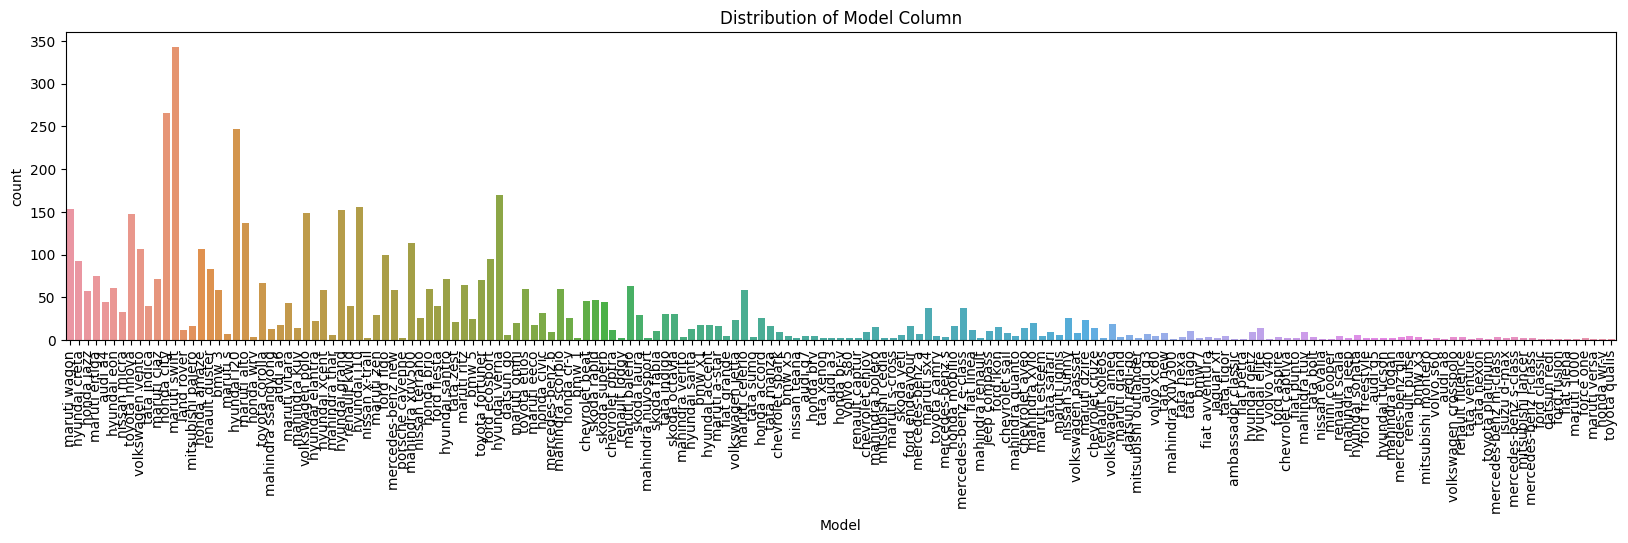

In [123]:
plt.figure(figsize=(20,4))
sns.countplot(df_train,x='Model',orient='h');
plt.xticks(rotation=90)
plt.title('Distribution of Model Column');

13. Price

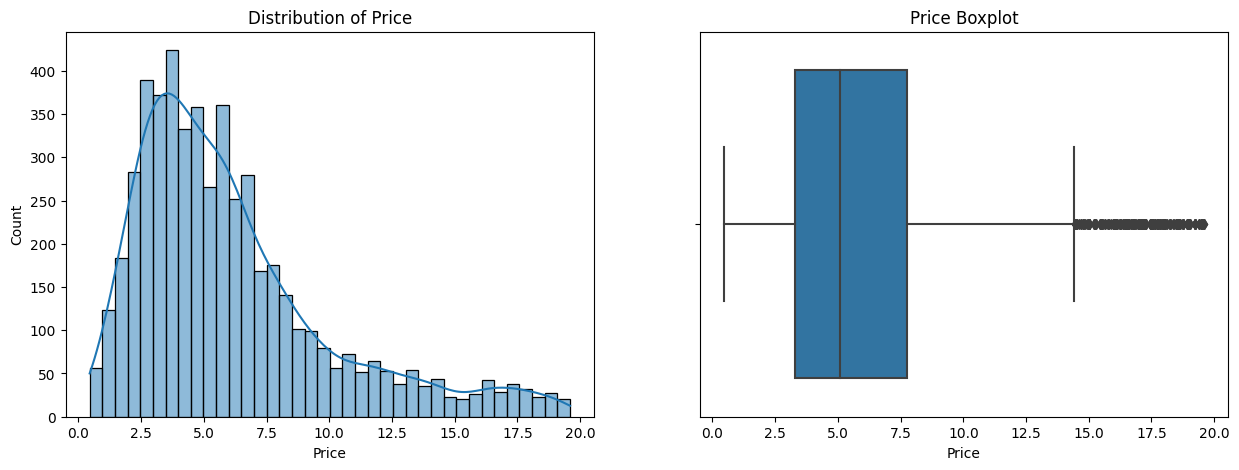

In [124]:
plot_num(df_train,'Price')

<ipython-input-125-64e12d2a51a6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),annot=True);


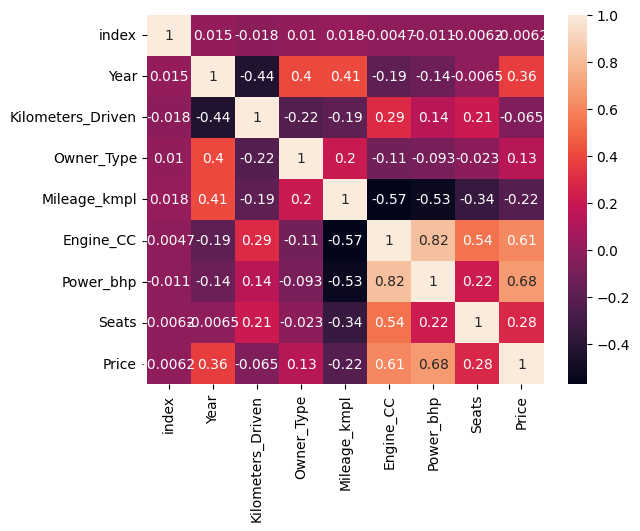

In [125]:
sns.heatmap(df_train.corr(),annot=True);

`Year`, `Enginee_CC`, `Power_bhp`, `Seats` has high correlation with Price but also they have strong relation between them

## One-Hot Encoding
creates new columns indicating the presence (or absence) of each possible value in the original data.

In [126]:
# Create dummies for categorical columns
dummy_Model   = pd.get_dummies(df_train.Model, prefix="Model")
dummy_Company = pd.get_dummies(df_train.Company, prefix="Company")
dummt_Transmission = pd.get_dummies(df_train.Transmission, prefix="Transmission")
dummt_Fuel_Type    = pd.get_dummies(df_train.Fuel_Type, prefix="Fuel_Type")
df_train = pd.concat([df_train, dummy_Company, dummy_Model, dummt_Transmission, dummt_Fuel_Type], axis=1)
df_train = df_train.drop(['index', 'Name', 'Location', 'Fuel_Type', 'Transmission', 'Company', 'Model'], axis = 1)
df_train.head()

,Year,Kilometers_Driven,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price,Company_ambassador,Company_audi,...,Model_volvo s60,Model_volvo s80,Model_volvo v40,Model_volvo xc60,Transmission_Automatic,Transmission_Manual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,2010,72000,3,26.60,998.0,58.16,5.0,1.75,0,0,...,0,0,0,0,0,1,1,0,0,0
1,2015,41000,3,19.67,1582.0,126.20,5.0,12.50,0,0,...,0,0,0,0,0,1,0,1,0,0
2,2011,46000,3,18.20,1199.0,88.70,5.0,4.50,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2012,87000,3,20.77,1248.0,88.76,7.0,6.00,0,0,...,0,0,0,0,0,1,0,1,0,0
4,2013,40670,2,15.20,1968.0,140.80,5.0,17.74,0,1,...,0,0,0,0,1,0,0,1,0,0


# Building Model

In [127]:
from sklearn.model_selection import train_test_split

X = df_train.drop(['Price','Kilometers_Driven', 'Owner_Type', 'Mileage_kmpl'],axis='columns')
y = df_train.Price
print(X.isnull().sum().sum())

98


Provided fills the missing values in dataframe **X** with the mean value of each column.

In [128]:
X.fillna(X.mean(), inplace=True)
print(X.isnull().sum().sum())

0


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

## lasso Regression

In [130]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1)
lasso_coef = lasso.fit(X_train, y_train).coef_

### Find the best alpha for model

In [131]:
def find_best_alpha(train_x,train_y):
  param_list = [0.001, 0.01, 0.1, 1.0, 10.0,100.0,1000.0]
  X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=0)
  for cnt,alpha in enumerate(param_list):
    lasso = Lasso(alpha=alpha)
    model = make_pipeline(StandardScaler(), lasso)
    # Fit model
    model.fit(X_train,y_train)

    train_rmae = np.sqrt(mean_absolute_error(y_train, model.predict(X_train)))
    test_rmae = np.sqrt(mean_absolute_error(y_test, model.predict(X_test)))
    if cnt == 0:
        best_score = test_rmae
        best_param = alpha
    elif best_score > test_rmae:
        best_score = test_rmae
        best_param = alpha

  # score
  print("The score of Lasso:", model.score(X_test, y_test))
  # MAE
  predict_res = model.predict(X_test)
  print("MAE:", mean_absolute_error(y_test, predict_res))

  return best_param

### Result

In [132]:
best_alpha = find_best_alpha(X_train, y_train)
model_lasso = Lasso(alpha = best_alpha)
lasso = make_pipeline(StandardScaler(), model_lasso)
lasso.fit(X_train, y_train)
pred_val = lasso.predict(X_test)

# Print out some head values
print(pred_val[:5])
print(y_test.values[:5])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.068e+01, tolerance: 4.766e+00
  model = cd_fast.enet_coordinate_descent(


The score of Lasso: -0.002020940768880264
MAE: 2.915764258420967
[ 3.73989061  4.89304759  5.49612568  6.70184615 14.67651747]
[ 2.65  4.44  4.43  4.6  16.11]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.607e+01, tolerance: 6.602e+00
  model = cd_fast.enet_coordinate_descent(


## DecisionTreeRegressor

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Define model. Specify a number for random_state to ensure same results each run
model_DTR = DecisionTreeRegressor(random_state=5)

# Fit model
model_DTR.fit(X_train, y_train)

DecisionTreeRegressor(random_state=5)

#### Find best tree size for model

In [134]:
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
  model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
  model.fit(X_train, y_train)
  preds_val = model.predict(X_test)
  mae = mean_absolute_error(y_test, preds_val)
  return(mae)

# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 25, 50, 100, 250, 500]:
  mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
  print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %f" %(max_leaf_nodes, mae))

Max leaf nodes: 5  		 Mean Absolute Error:  1.835348
Max leaf nodes: 25  		 Mean Absolute Error:  1.312974
Max leaf nodes: 50  		 Mean Absolute Error:  1.158195
Max leaf nodes: 100  		 Mean Absolute Error:  1.045160
Max leaf nodes: 250  		 Mean Absolute Error:  0.973637
Max leaf nodes: 500  		 Mean Absolute Error:  0.968643


#### Result

In [135]:
# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
scores = {leaf_size: get_mae(leaf_size, X_train, X_test, y_train, y_test) for leaf_size in [5, 25, 50, 100, 250, 500]}
best_tree_size = min(scores, key=scores.get)

# Fill in argument to make optimal size and uncomment
DTR_model = DecisionTreeRegressor(max_leaf_nodes = best_tree_size)

# Fit model
DTR_model.fit(X_train, y_train)
print("The score of DecisionTreeRegressor:", DTR_model.score(X_test, y_test))
# MAE
predict_res = DTR_model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, predict_res))

DTR_model = DecisionTreeRegressor()
DTR_model.fit(X_train, y_train)
predict = DTR_model.predict(X_test)

# Print out some head values
print(predict[:5])
print(y_test.values[:5])

The score of DecisionTreeRegressor: 0.8291778260962523
MAE: 0.9647993581780738
[ 3.86   4.74   5.513  4.5   17.65 ]
[ 2.65  4.44  4.43  4.6  16.11]


## Conclusion

So sánh kết quả của 2 model, đánh giá lỗi

In [136]:
regression_models = [lasso, DTR_model]
score_train = list()
score_test = list()

for model in regression_models:
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  score_train.append(model.score(X_train,y_train))
  score_test.append(model.score(X_test,y_test))

model_names = ['Lassso Regression','Decision Tree Regressor']

scores = pd.DataFrame([model_names,score_train,score_test])
scores = scores.transpose()
scores.columns = [ 'Model','Training Set Accuracy','Testing Set Accuracy']
scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.607e+01, tolerance: 6.602e+00
  model = cd_fast.enet_coordinate_descent(


,Model,Training Set Accuracy,Testing Set Accuracy
0,Lassso Regression,0.876661,0.844444
1,Decision Tree Regressor,0.968327,0.811434


Text(0, 0.5, 'Trainig Set Accuracy')

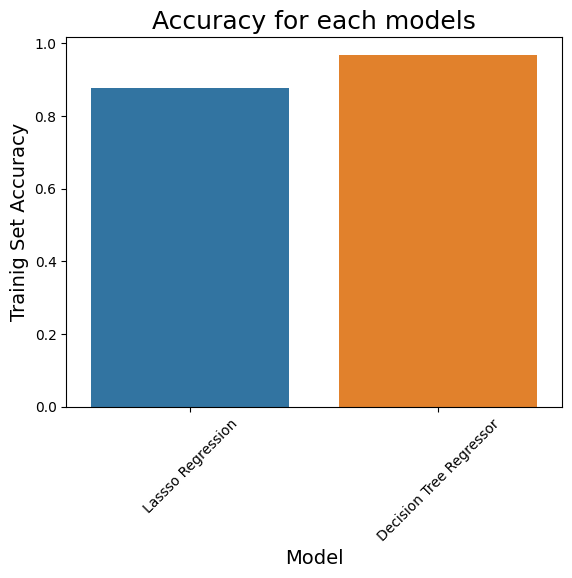

In [137]:
sns.barplot(data=scores, x='Model', y='Training Set Accuracy')
plt.title('Accuracy for each models', size=18)
plt.xticks(rotation=45,size=10)
plt.xlabel('Model',size=14)
plt.ylabel('Trainig Set Accuracy',size=14)